# __Portfolio Analysis Using TDAmeritrade API__

_Importing Packages and Setting Seaborn_

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [87]:
import TDkit as kit
from td.client import TDClient
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import quandl as ql
import os
import edhec_risk_kit as erk
import datetime
import operator
from fredapi import Fred
sns.set(style='whitegrid', font_scale=5)

_Logging in to the TDAmeritrade API_

In [3]:
kit.login()

_Setting Number of Years for Returns_

In [20]:
n=20

_Pulling Historical Risk-Free Rates Using 10-Yr U.S. Treasury Bond Yield Using Quandl API 
and Calculating Mean Risk-Free Rate of the Specified Time Frame_

In [21]:
riskfree_rate=kit.ql_rf(n)
mean_riskfree_rate=pd.DataFrame.mean(riskfree_rate)

_Pulling Closing Price Data from TDAmeritrade API and Creating DataFrame_

In [22]:
Port_holdings=kit.Port_consol(kit.Ticker_List, n)

_Calculating Percentage Change_

In [113]:
Port_pct=Port_holdings.pct_change()
Port_pct=Port_pct[1:]
Total_Port_pct=Port_pct.mean(axis=1)

_Computing Both Covariance and Correlation Matrix for Portolio_

In [24]:
Port_cov=Port_pct.cov()
Port_corr=Port_pct.corr()

_Setting Current Portfolio Weights_

In [25]:
Weighted_port=kit.weights*Port_pct

_Calculating Exponential Moving Averages for Each Stock in Portfolio_

In [26]:
Port_ema=Port_holdings.ewm(span=15, adjust=False).mean()

_Annualizing Returns for Portfolio & SPY_

_SPY Will be Used as Benchmark_

In [34]:
Wt_Port_holdings_ann=kit.Port_holdings_ann(Weighted_port, n)
Total_Wt_Port_ann=Wt_Port_holdings_ann.sum(axis=1)
Port_holdings_ann_series=Wt_Port_holdings_ann.iloc[0]
SPY_ann=kit.SPY_ann(n)

_Calculating Risk Measures for Portfolio Holdings & SPY_

In [35]:
Wt_Port_holdings_ann_vol=kit.Port_holdings_ann_vol(Weighted_port, n)
Total_Wt_Port_ann_vol=Wt_Port_holdings_ann_vol.sum(axis=1)
SPY_ann_vol=kit.SPY_ann(n, vol=True)

In [40]:
Port_holdings_ann=kit.Port_holdings_ann(Port_pct, n)
Port_holdings_ann_series=Port_holdings_ann.iloc[0]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


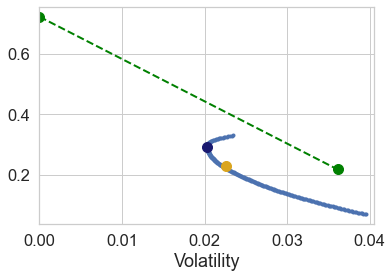

In [78]:
ef=kit.plot_ef(250, er=Port_holdings_ann_series, cov=Port_cov, riskfree_rate=mean_riskfree_rate, show_cml=True, show_ew=True, show_gmv=True)

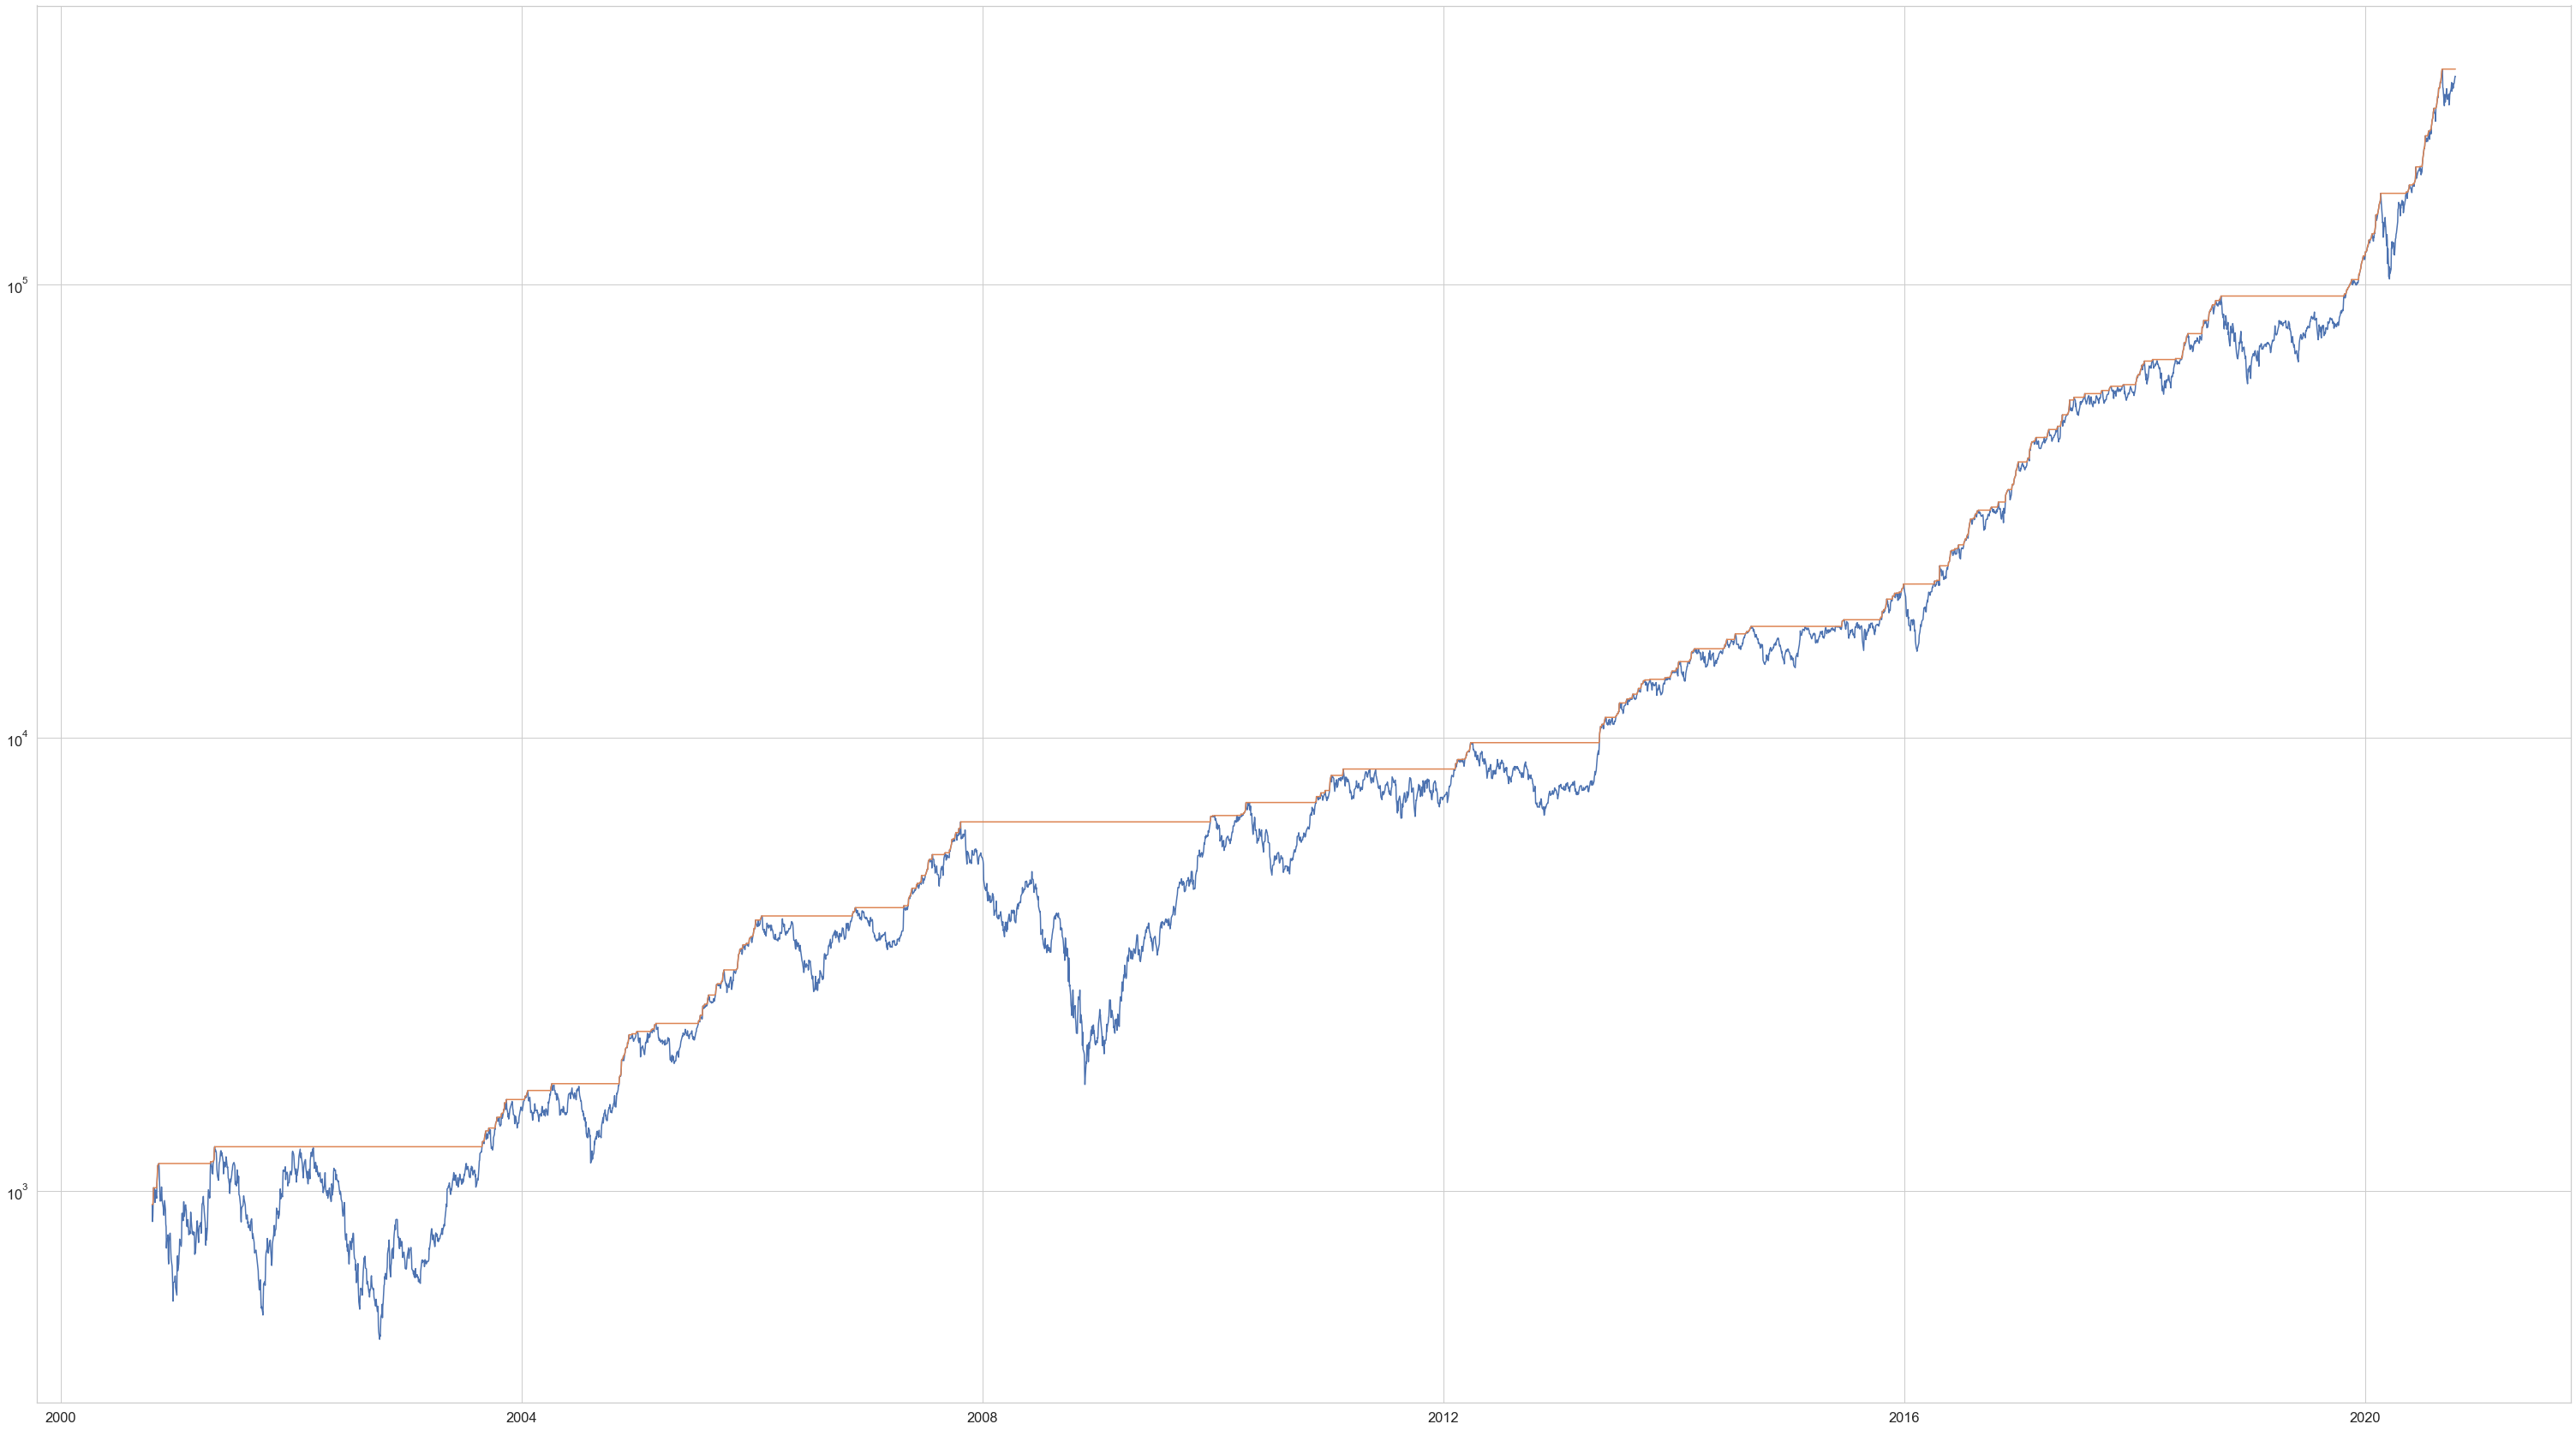

In [146]:
Port_drawdown=kit.drawdown(Total_Port_pct)
plt.figure(figsize=(53,30))
plt.plot(Port_drawdown)
plt.yscale('log')
plt.show()